In [1]:
from keras import Input, layers, backend, Model, losses, datasets, models, metrics, optimizers, initializers
from keras.regularizers import l2
from keras.utils import Sequence
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import math

In [2]:
SaveLossDataPath = "/home/ug-ml/felix-ML/VAE_000/DataAllInOne_Normalised/VAE_000_2/DataAnalysis/0point1_data"
ValMostSimilarPath = "/Validation_MostSimilar_0point1_ZMCC.npy"
TestMostSimilarPath = "/Test_MostSimilar_0point1_ZMCC.npy"

ValVAEPath = "/Validation_VAE_0point1_zmcc.npy"
TestVAEPath = "/Test_VAE_0point1_zmcc.npy"



MostSimilarValidation = np.load(SaveLossDataPath + ValMostSimilarPath)
MostSimilarTest = np.load(SaveLossDataPath + TestMostSimilarPath)

VAEValidation = np.load(SaveLossDataPath + ValVAEPath)
VAETest = np.load(SaveLossDataPath + TestVAEPath)

In [3]:
def MakeCumDist(Values):
    min_loss = np.min(Values)
    max_loss = np.max(Values)
    SortLoss = np.sort(Values)
    CumVal = np.arange(len(Values), dtype = np.float32) / len(Values)
    
    return(SortLoss, CumVal)


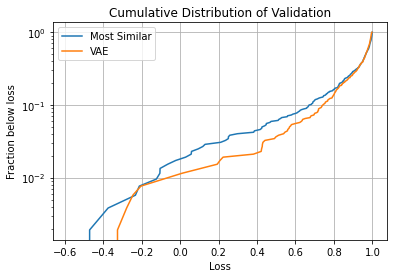

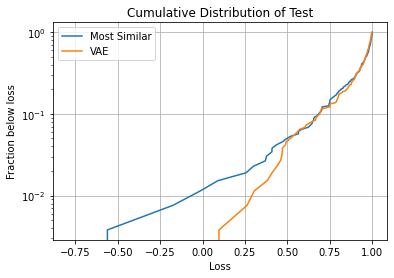

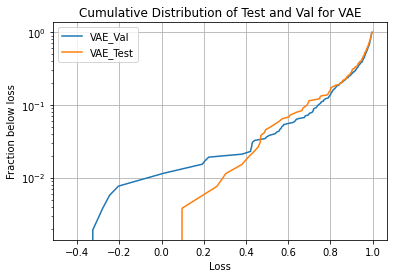

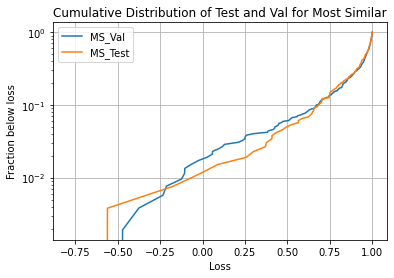

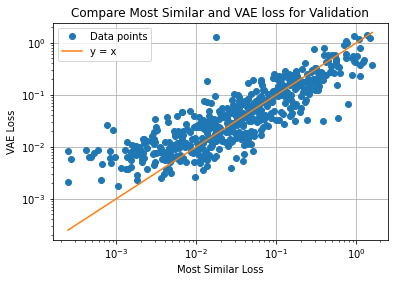

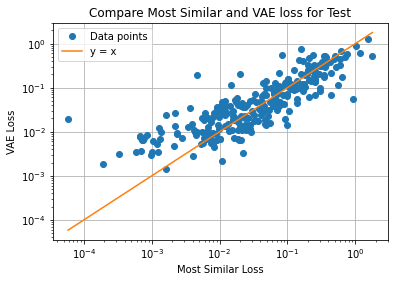

MostSimilar Test ZMCC loss:  0.8802572
VAE Test ZMCC loss:  0.8929339


In [8]:
#MS = MostSimilar

MS_Loss_Val, MS_CumVal_Val = MakeCumDist(MostSimilarValidation)
VAE_Loss_Val, VAE_CumVal_Val = MakeCumDist(VAEValidation)

plt.plot(MS_Loss_Val, MS_CumVal_Val, label = "Most Similar")
plt.plot(VAE_Loss_Val, VAE_CumVal_Val, label = "VAE")
plt.xlabel('Loss')

plt.ylabel('Fraction below loss')
plt.title('Cumulative Distribution of Validation')
plt.legend()
#plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.show()




MS_Loss_Test, MS_CumVal_Test = MakeCumDist(MostSimilarTest)
VAE_Loss_Test, VAE_CumVal_Test = MakeCumDist(VAETest)

plt.plot(MS_Loss_Test, MS_CumVal_Test, label = "Most Similar")
plt.plot(VAE_Loss_Test, VAE_CumVal_Test, label = "VAE")
plt.xlabel('Loss')

plt.ylabel('Fraction below loss')
plt.title('Cumulative Distribution of Test')
plt.legend()
#plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.show()




plt.plot(VAE_Loss_Val, VAE_CumVal_Val, label = "VAE_Val")
plt.plot(VAE_Loss_Test, VAE_CumVal_Test, label = "VAE_Test")
plt.xlabel('Loss')

plt.ylabel('Fraction below loss')
plt.title('Cumulative Distribution of Test and Val for VAE')
plt.legend()
#plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.show()




plt.plot(MS_Loss_Val, MS_CumVal_Val, label = "MS_Val")
plt.plot(MS_Loss_Test, MS_CumVal_Test, label = "MS_Test")
plt.xlabel('Loss')

plt.ylabel('Fraction below loss')
plt.title('Cumulative Distribution of Test and Val for Most Similar')
plt.legend()
#plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.show()





plt.plot(1 - MostSimilarValidation, 1 - VAEValidation, "o", label = "Data points")

min_val = min(np.min(MostSimilarValidation), np.min(VAEValidation))
max_val = max(np.max(MostSimilarValidation), np.max(VAEValidation))

plt.plot([1-min_val, 1-max_val], [1-min_val, 1-max_val], label = "y = x")

plt.xscale("log")
plt.yscale("log")
plt.xlabel('Most Similar Loss')
plt.ylabel('VAE Loss')
plt.title('Compare Most Similar and VAE loss for Validation')
plt.legend()
plt.grid()
plt.show()

#print(np.mean(MostSimilarTest), np.mean(VAETest))


plt.plot(1-MostSimilarTest, 1-VAETest, "o", label = "Data points")

min_val = min(np.min(MostSimilarTest), np.min(VAETest))
max_val = max(np.max(MostSimilarTest), np.max(VAETest))

plt.plot([1-min_val, 1-max_val], [1-min_val, 1-max_val], label = "y = x")

plt.xscale("log")
plt.yscale("log")
plt.xlabel('Most Similar Loss')
plt.ylabel('VAE Loss')
plt.title('Compare Most Similar and VAE loss for Test')
plt.legend()
plt.grid()
plt.show()


print("MostSimilar Test ZMCC loss: ", np.mean(MostSimilarTest))
print("VAE Test ZMCC loss: ", np.mean(VAETest))

/home/ug-ml/felix-ML/env/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


[ 1  0  1  1  7  7  5  6 14 28 22 29 27 29 21 22 25 11  4  3] [0.01958531        nan 0.00181299 0.00314093 0.00608518 0.0059643
 0.00930878 0.01295417 0.02536769 0.015909   0.02971009 0.03075622
 0.04303806 0.07015046 0.11961254 0.2177311  0.27556688 0.3354231
 0.51380944 0.81555897] [7.5553158e-05 1.2665788e-04 2.1233001e-04 3.5595160e-04 5.9671933e-04
 1.0003448e-03 1.6769845e-03 2.8113080e-03 4.7128950e-03 7.9007288e-03
 1.3244834e-02 2.2203721e-02 3.7222482e-02 6.2399987e-02 1.0460775e-01
 1.7536514e-01 2.9398340e-01 4.9283597e-01 8.2619309e-01 1.3850349e+00]


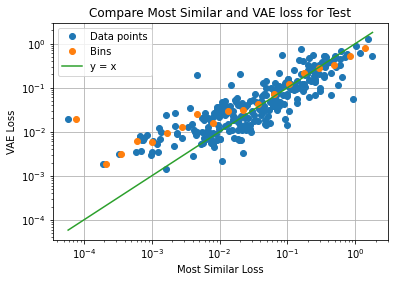

In [24]:


def FindBinExp(Value, min_val, max_val, NoBins):
    LogVal = math.log(Value)
    Log_min_val = math.log(min_val)
    Log_max_val = math.log(max_val)
    
    index = math.floor(((LogVal - Log_min_val) / (Log_max_val - Log_min_val)) * NoBins)
    
    if(index == NoBins):
        index=NoBins-1
    return index


def CreateBins(MSData, VAEData, NoBins = 10):
    MSData_norm = 1 - MSData
    VAEData_norm = 1 - VAEData

    min_MS_val = min(MSData_norm)
    max_MS_val = max(MSData_norm)
    
    min_MS_val_pow = math.log(min_MS_val)
    max_MS_val_pow = math.log(max_MS_val)
    
    bin_size = (max_MS_val_pow - min_MS_val_pow) / NoBins
    
    Bin_Vals = np.exp(((np.arange(NoBins, dtype = np.float32) / NoBins)) * (max_MS_val_pow - min_MS_val_pow) + min_MS_val_pow + bin_size / 2)

    Bin_Losses = np.zeros(NoBins, dtype = np.float32)
    Bin_Num = np.zeros(NoBins, dtype = np.int)

    for i in range(0, len(MSData_norm)):
        bin_i = FindBinExp(MSData_norm[i], min_MS_val, max_MS_val, NoBins)
        Bin_Num[bin_i]+=1
        Bin_Losses[bin_i]+=VAEData_norm[i]
        
    for i in range(0, NoBins):
        Bin_Losses[i] = Bin_Losses[i] / Bin_Num[i]
    
    return(Bin_Num, Bin_Losses, Bin_Vals)
        

    
Bin_Num_test, Bin_Losses_test, Bin_Vals_test = CreateBins(MostSimilarTest, VAETest, 20)

            
print(Bin_Num_test, Bin_Losses_test, Bin_Vals_test)

plt.plot(1-MostSimilarTest, 1-VAETest, "o", label = "Data points")

plt.plot(Bin_Vals_test, Bin_Losses_test, "o", label = "Bins")

min_val = min(np.min(MostSimilarTest), np.min(VAETest))
max_val = max(np.max(MostSimilarTest), np.max(VAETest))

plt.plot([1-min_val, 1-max_val], [1-min_val, 1-max_val], label = "y = x")

plt.xscale("log")
plt.yscale("log")
plt.xlabel('Most Similar Loss')
plt.ylabel('VAE Loss')
plt.title('Compare Most Similar and VAE loss for Test')
plt.legend()
plt.grid()
plt.show()